In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Problem 1: The Multivariate Normal Distribution (20 pts.)

The multivariate normal distribution is an important distribution for the study of multivariate statistical models.  Specifically, the multivariate normal distribution is one of just a few ways to parametrically specify a data generating process that encodes the covariance between pairs of random variables.  A random vector $\boldsymbol x \in \mathbb{R}^P$ is said to follow a multivariate normal distribution if:

$$f(\boldsymbol x \mid \boldsymbol \mu , \Sigma) \sim \mathcal{N}_P(\boldsymbol x \mid \boldsymbol \mu , \Sigma) = (2 \pi)^{-\frac{P}{2}} \text{det}(\Sigma)^{-\frac{1}{2}} \exp \left[-\frac{1}{2} (\boldsymbol x - \boldsymbol \mu )' \Sigma^{-1} (\boldsymbol{x} - \boldsymbol \mu) \right]$$

Suppose we have $N$ iid draws from an unknown multivariate normal distribution.  We can specify the joint log-likelihood as:

$$\ell \ell (\boldsymbol x \mid \boldsymbol \mu , \Sigma) = -\frac{NP}{2} \log 2 \pi - \frac{N}{2} \log \text{det}(\Sigma) - \frac{1}{2} \sum \limits_{i = 1}^N (\boldsymbol x_i - \boldsymbol \mu )' \Sigma^{-1} (\boldsymbol{x}_i - \boldsymbol \mu)$$

Show that the maximum likelihood estimates of the parameters are:

$$\hat{\boldsymbol \mu} = \frac{1}{N} \sum \limits_{i = 1}^N \boldsymbol{x}_i$$

$$\hat{\Sigma} = \frac{1}{N} \sum \limits_{i = 1}^N (\boldsymbol x_i - \hat{\boldsymbol \mu})(\boldsymbol x_i - \hat{\boldsymbol \mu})'$$

Some hints:

1. Let $\gamma = y'Ay$ such that $\gamma$ evaluates to a scalar:
  
  $$\frac{\partial \gamma}{\partial y} = 2Ay$$
  
2. Let $\gamma = y'A^{-1}y$ such that $\gamma$ evaluates to a scalar:
  
  $$\frac{\partial \gamma}{\partial A^{-1}} = yy'$$
  
This arises because of a trace trick rearrangement, $\gamma = y'A^{-1}y = \text{tr}(yy'A^{-1})$
  
3. A well-known matrix identity is:
  
  $$\frac{\partial \log \text{det}(A)}{\partial A^{-1}} = A$$
  
when $A$ is symmetric.

1. $\hat \mu = \frac{1}{N} \sum \limits_{i = 1}^N \boldsymbol x_i$

$$
\begin{align*}
\quad \frac{\partial}{\partial \boldsymbol \mu} \ell \ell (\boldsymbol x \mid \boldsymbol \mu , \Sigma) &= \sum \limits_{i=1}^N \frac{1}{N} \bold \Sigma^-1 (\boldsymbol x_i - \boldsymbol \mu) = 0 \\
0 &= \Sigma^{-1} \sum \limits_{i=1}^N (\boldsymbol x_i - \boldsymbol \mu) \\
0 &= \sum \limits_{i=1}^N (\boldsymbol x_i - \boldsymbol \mu) \\
0 &= \sum \limits_{i=1}^N \boldsymbol x_i - N\boldsymbol \mu\\
\hat{\boldsymbol\mu} &= \frac{1}{N}\sum \limits_{i=1}^N \boldsymbol x_i
\end{align*}
$$


2. $\hat \Sigma = \frac{1}{N} \sum\limits_{i=1}^N (x_i-\hat \mu)(x_i - \hat \mu)^\top$
   
$$
\begin{align*}
\frac{\partial}{\partial \boldsymbol \Sigma^{-1}} \ell \ell (\boldsymbol x \mid \boldsymbol \mu , \Sigma) &= \frac{N}{2}\boldsymbol \Sigma - \frac{1}{2} \sum \limits_{i=1}^N (\boldsymbol x_i - \boldsymbol \mu)(\boldsymbol x_i - \boldsymbol \mu)^\top = 0 \\
\frac{N}{2} \Sigma  &= \frac{1}{2} \sum \limits_{i=1}^N (\boldsymbol x_i-  \boldsymbol \mu)(\boldsymbol x_i - \boldsymbol \mu)^\top \\
\hat \Sigma &= \frac{1}{N} \sum \limits_{i=1}^N (\boldsymbol x_i - \hat{\boldsymbol\mu})(\boldsymbol x_i - \hat{\boldsymbol\mu})^\top

\end{align*}
$$


## Problem 2: Cancer Data (40 Points)

In a number of data sets, the predictors are a collection of ordered categorical ratings of objects.  These predictors are then used to classify objects into categories.  In class, we discussed plausibly continuous predictors (like income) and unordered categorical predictors (like manufacturing country).  However, we did not spend time discussing ordered categorical predictors.  This problem will see you work with two ordered categorical predictors - rating of uniformity of cell size (`UCellSize`: 1-10 with 10 being most irregular) and single epithelial cell size (`SECellSize`: 1-10 with 10 being largest) - trying to predict whether or not a cell is cancerous (`Malignant` is one if cancerous, 0 otherwise).

The problem is that there is no in-between: we must either treat the predictor as an unordered outcome and lose any information that comes from seeing how the predictor increases or decreases while preserving its discreteness **or** treat the predictor as continuous preserving any ordering but losing its discrete nature.  Each choice comes with some downside, so we'll see how each one works on the training data set and use it to assess predictive accuracy on the test data set.

### Part 1 (15 points)

If we choose to treat each predictor as a discrete input, then we can use a generative classifier built via Bayes' theorem to create predictions that preserve dependencies between the predictors.  For discrete predictors $X$ and $Z$, the classifier can be built using the following formula:

$$P(y = 1 | X = x , Z = z) = \frac{P(X = x,Z = z | y = 1)P(y = 1)}{P(X = x,Z = z | y = 1)P(y = 1) + P(X = x,Z = z | y = 0)P(y = 0)}$$

Using the training data, create a lookup table that encodes the probability that an observation with $X = x$ **and** $Z = z$ is malignant.  This should be a $10 \times 10$ table where each element corresponds to a possible $\{x,z\}$ pair.  For some elements of this table, there are zero elements in the training set!  These elements should be recorded as missing since we can't compute a probability using this approach.

Along with the probability lookup table, create a corresponding table that encodes the **Bayes' classifier** - for a given $\{x,z\}$ pair, which class has the highest probability of occurrence?

What is the general relationship between these predictors and the probability that a cell is cancerous?  Does it appear that we've missed some information by treating this problem in an unordered discrete fashion?


#### Answer:

In [301]:
# Load data
train_df = pd.read_csv('cancerTrain.csv')
test_df = pd.read_csv('cancerTest.csv')
train_df.head()

,UCellSize,SECellSize,Malignant
0,1,2,0
1,4,7,0
2,1,2,0
3,8,3,0
4,1,2,0


In [302]:
# Consider predictors as discrete variables
# List the unique levels of each predictor
print(train_df['UCellSize'].sort_values(ascending=True).unique())
print(train_df['SECellSize'].sort_values(ascending=True).unique())

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [303]:
train_df.query('UCellSize == 1 and SECellSize == 6')

,UCellSize,SECellSize,Malignant


In [304]:
# frequency table
frequency_table_df = pd.DataFrame(columns=['UCellSize', 'SECellSize', 'Frequency'])
for i in range(1, 11):
    for j in range(1, 11):
        frequency_table_df.loc[len(frequency_table_df)] = [i, j, train_df.query('UCellSize == {} & SECellSize == {}'.format(i, j)).shape[0]]
# color 0 as red
frequency_table_df.pivot_table(index='UCellSize', columns='SECellSize', values='Frequency').style.applymap(lambda value: 'background-color: red' if value == 0 else None)

SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,30,201,10,5,1,0,0,1,0,1
2,3,23,3,1,2,3,0,0,0,0
3,0,17,16,3,5,1,0,2,0,1
4,0,9,6,5,3,5,2,0,1,0
5,0,3,7,5,3,5,0,2,0,2
6,0,1,5,5,4,1,0,2,0,5
7,0,0,0,4,5,1,2,1,0,1
8,0,0,5,4,4,5,0,1,0,3
9,0,0,1,0,1,2,0,0,0,1


In [305]:
# probability of malignant cell given the predictor values
lookup_table_df = pd.DataFrame(columns=['UCellSize', 'SECellSize', 'Probability'])
for i in range(1, 11):
    for j in range(1, 11):
        df_malignant = train_df.query('Malignant == 1')
        df_benign = train_df.query('Malignant == 0')

        prior = df_malignant.shape[0] / train_df.shape[0] # P(y = 1)
        likelihood = (df_malignant.query('UCellSize == {} & SECellSize == {}'.format(i, j)).shape[0]) / (df_malignant.shape[0]) # P(X=x, Z=z | y = 1) * P(y = 1)
        marginal = prior * likelihood + (df_benign.shape[0] / train_df.shape[0]) * ((df_benign.query('UCellSize == {} & SECellSize == {}'.format(i, j)).shape[0]) / (df_benign.shape[0])) # P(X=x, Z=z | y = 1) * P(y = 1) + P(X=x, Z=z | y = 0) * P(y = 0)
        try:
            posterior = prior * likelihood / marginal # P(X=x, Z=z | y = 1) * P(y = 1) / (P(X=x, Z=z | y = 1) * P(y = 1) + P(X=x, Z=z | y = 0) * P(y = 0))
        except ZeroDivisionError:
            posterior = np.nan
        lookup_table_df.loc[len(lookup_table_df)] = [i, j, posterior]

lookup_table_df = lookup_table_df.pivot_table(index='UCellSize', columns='SECellSize', values='Probability')
lookup_table_df.index = lookup_table_df.index.astype(int)
lookup_table_df.columns = lookup_table_df.columns.astype(int)
lookup_table_df_1 = lookup_table_df
lookup_table_df.style.background_gradient(cmap='coolwarm', axis=None).applymap(lambda value: 'background-color: grey' if pd.isna(value) else None)

SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,0.033333,0.004975,0.000000,0.400000,0.000000,nan,nan,0.000000,nan,0.000000
2,0.000000,0.086957,0.666667,0.000000,0.500000,1.000000,nan,nan,nan,nan
3,nan,0.294118,0.562500,0.333333,0.800000,1.000000,nan,1.000000,nan,1.000000
4,nan,0.888889,0.833333,0.800000,1.000000,0.800000,0.000000,nan,1.000000,nan
5,nan,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,1.000000
6,nan,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,1.000000
7,nan,nan,nan,1.000000,0.800000,1.000000,1.000000,1.000000,nan,1.000000
8,nan,nan,0.800000,1.000000,1.000000,1.000000,nan,1.000000,nan,1.000000
9,nan,nan,1.000000,nan,0.000000,1.000000,nan,nan,nan,1.000000


In [306]:
# Bayes Classifier
lookup_table_df.applymap(lambda cell: 'Malignant' if cell > 0.5 else ('Benign' if cell < 0.5 else 'Unknown')).\
    style.applymap(lambda value: 'background-color: red' if value == 'Malignant' else ('background-color: green' if value == 'Benign' else None))

SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,Benign,Benign,Benign,Benign,Benign,Unknown,Unknown,Benign,Unknown,Benign
2,Benign,Benign,Malignant,Benign,Unknown,Malignant,Unknown,Unknown,Unknown,Unknown
3,Unknown,Benign,Malignant,Benign,Malignant,Malignant,Unknown,Malignant,Unknown,Malignant
4,Unknown,Malignant,Malignant,Malignant,Malignant,Malignant,Benign,Unknown,Malignant,Unknown
5,Unknown,Malignant,Malignant,Malignant,Malignant,Malignant,Unknown,Malignant,Unknown,Malignant
6,Unknown,Malignant,Malignant,Malignant,Malignant,Malignant,Unknown,Malignant,Unknown,Malignant
7,Unknown,Unknown,Unknown,Malignant,Malignant,Malignant,Malignant,Malignant,Unknown,Malignant
8,Unknown,Unknown,Malignant,Malignant,Malignant,Malignant,Unknown,Malignant,Unknown,Malignant
9,Unknown,Unknown,Malignant,Unknown,Benign,Malignant,Unknown,Unknown,Unknown,Malignant


Based on the tables above, `SECellSize` and `UCellSize` seem to be positively correlated with the probability that the cell is cancerous or malignant. We can see this relationship demonstrated in the above shaded tables. However, by treating the predictors as discrete, we've lost interpolatability and encountered zero-frequency problem, which arises when a given predictor pair $(x, z)$ is not present in the training set. In this situation, we cannot compute its corresponding posterior and therefore not be bale to classify a new observation that we have not seen before.

### Part 2 (15 points)

Now, build classifiers that treat the two predictors as continuous (and ordered, in turn).  Specifically, use the training data to train 1) a logistic regression classifier and 2) a QDA classifier.  Using these two classifiers, create probability and Bayes' classifier tables for each training method for each possible combination of $x$ and $z$.  

How do these tables differ from the ones computed in part 1?  Have we lost anything by treating the predictors as continuous when they are truly discrete?


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


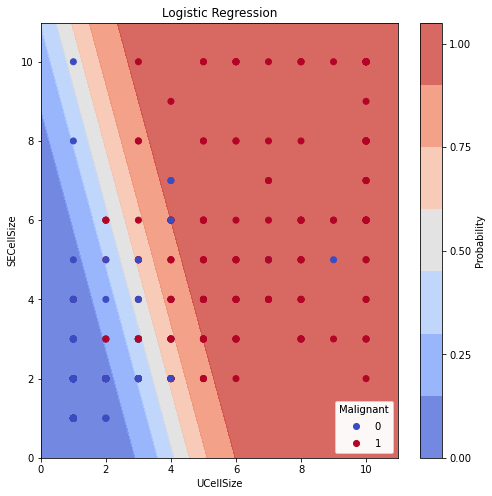

In [307]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(solver='lbfgs', multi_class='ovr', penalty='none', )
logistic_reg.fit(train_df[['UCellSize', 'SECellSize']], train_df['Malignant'])

# plot decision boundary
x_min, x_max = train_df['UCellSize'].min() - 1, train_df['UCellSize'].max() + 1
y_min, y_max = train_df['SECellSize'].min() - 1, train_df['SECellSize'].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logistic_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = ax.scatter(train_df['UCellSize'], train_df['SECellSize'], c=train_df['Malignant'], cmap=plt.cm.coolwarm)
ax.set_xlabel('UCellSize')
ax.set_ylabel('SECellSize')
ax.set_title('Logistic Regression')
ax.add_artist(ax.legend(*scatter.legend_elements(), loc='lower right', title='Malignant'))
fig.colorbar(contour, ticks=[0, 0.25, 0.5, 0.75, 1], label = 'Probability')
plt.show()


In [308]:
# Lookup table
lookup_table_df = pd.DataFrame(columns=['UCellSize', 'SECellSize', 'Probability'])
for i in range(1, 11):
    for j in range(1,11):
        lookup_table_df.loc[len(lookup_table_df)] = [i, j, np.nan]
lookup_table_df['Probability'] = logistic_reg.predict_proba(lookup_table_df[['UCellSize', 'SECellSize']])[:, 1]
lookup_table_df = lookup_table_df.pivot_table(index='UCellSize', columns='SECellSize', values='Probability')
lookup_table_df.index = lookup_table_df.index.astype(int)
lookup_table_df.columns = lookup_table_df.columns.astype(int)


lookup_table_df_logistic = lookup_table_df
lookup_table_df.style.background_gradient(cmap='coolwarm', axis=None)

SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,0.023495,0.035363,0.052902,0.078432,0.114790,0.164984,0.231390,0.314458,0.411386,0.515716
2,0.079329,0.116050,0.166691,0.233592,0.317124,0.414378,0.518797,0.621600,0.714526,0.792258
3,0.235808,0.319803,0.417376,0.521878,0.624499,0.717037,0.794282,0.854713,0.899635,0.931776
4,0.524956,0.627388,0.719534,0.796291,0.856239,0.900744,0.932556,0.954686,0.969789,0.979964
5,0.798286,0.857751,0.901842,0.933328,0.955217,0.970149,0.980205,0.986919,0.991376,0.994323
6,0.934092,0.955742,0.970504,0.980443,0.987078,0.991481,0.994393,0.996313,0.997577,0.998408
7,0.980678,0.987234,0.991585,0.994461,0.996358,0.997607,0.998428,0.998968,0.999322,0.999555
8,0.994529,0.996402,0.997636,0.998447,0.998980,0.999331,0.999561,0.999712,0.999811,0.999876
9,0.998466,0.998993,0.999339,0.999566,0.999715,0.999813,0.999877,0.999919,0.999947,0.999965


In [309]:
# Bayes Classifier
lookup_table_df.applymap(lambda cell: 'Malignant' if cell > 0.5 else ('Benign' if cell < 0.5 else 'Unknown')).\
    style.applymap(lambda value: 'background-color: red' if value == 'Malignant' else ('background-color: green' if value == 'Benign' else None))


SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Benign,Malignant
2,Benign,Benign,Benign,Benign,Benign,Benign,Malignant,Malignant,Malignant,Malignant
3,Benign,Benign,Benign,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
4,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
5,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
6,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
7,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
8,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
9,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


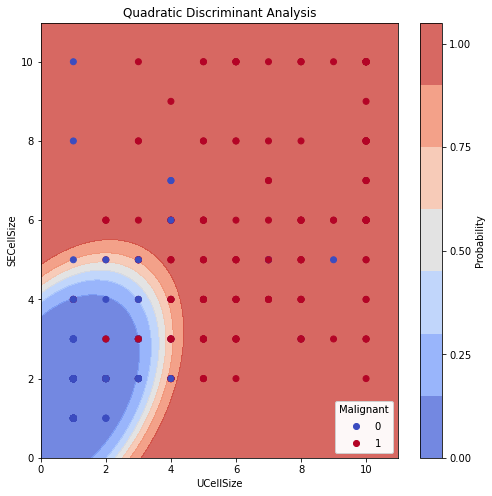

In [310]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(train_df[['UCellSize', 'SECellSize']], train_df['Malignant'])
y_train_pred = qda.predict(train_df[['UCellSize', 'SECellSize']])

# plot decision boundary
x_min, x_max = train_df['UCellSize'].min() - 1, train_df['UCellSize'].max() + 1
y_min, y_max = train_df['SECellSize'].min() - 1, train_df['SECellSize'].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = ax.scatter(train_df['UCellSize'], train_df['SECellSize'], c=train_df['Malignant'], cmap=plt.cm.coolwarm)
ax.set_xlabel('UCellSize')
ax.set_ylabel('SECellSize')
ax.set_title('Quadratic Discriminant Analysis')
ax.add_artist(ax.legend(*scatter.legend_elements(), loc='lower right', title='Malignant'))
fig.colorbar(contour, ticks=[0, 0.25, 0.5, 0.75, 1], label = 'Probability')
plt.show()


In [311]:
# look up table
lookup_table_df = pd.DataFrame(columns=['UCellSize', 'SECellSize', 'Probability'])
for i in range(1, 11):
    for j in range(1,11):
        lookup_table_df.loc[len(lookup_table_df)] = [i, j, np.nan]
lookup_table_df['Probability'] = qda.predict_proba(lookup_table_df[['UCellSize', 'SECellSize']])[:, 1]
lookup_table_df = lookup_table_df.pivot_table(index='UCellSize', columns='SECellSize', values='Probability')
lookup_table_df.index = lookup_table_df.index.astype(int)
lookup_table_df.columns = lookup_table_df.columns.astype(int)
lookup_table_df_qda = lookup_table_df
lookup_table_df.style.background_gradient(cmap='coolwarm', axis=None)

SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,0.018829,0.013267,0.026750,0.140839,0.740422,0.993142,0.999953,1.000000,1.000000,1.000000
2,0.061429,0.029004,0.038253,0.133838,0.636542,0.983026,0.999821,0.999999,1.000000,1.000000
3,0.406770,0.169327,0.150238,0.309104,0.767609,0.986140,0.999776,0.999999,1.000000,1.000000
4,0.956646,0.810353,0.707095,0.799163,0.950338,0.996289,0.999909,0.999999,1.000000,1.000000
5,0.999542,0.996379,0.990220,0.990885,0.997072,0.999679,0.999988,1.000000,1.000000,1.000000
6,0.999998,0.999982,0.999923,0.999890,0.999946,0.999991,0.999999,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [312]:
# bayes classifier
lookup_table_df.applymap(lambda cell: 'Malignant' if cell > 0.5 else ('Benign' if cell < 0.5 else 'Unknown')).\
    style.applymap(lambda value: 'background-color: red' if value == 'Malignant' else ('background-color: green' if value == 'Benign' else None))

SECellSize,1,2,3,4,5,6,7,8,9,10
UCellSize,,,,,,,,,,
1,Benign,Benign,Benign,Benign,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
2,Benign,Benign,Benign,Benign,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
3,Benign,Benign,Benign,Benign,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
4,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
5,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
6,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
7,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
8,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant
9,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant,Malignant


From both Logistic Regression and QDA, we can see that we are now able to predict every possible pair of values for the predictors. However, this also means that we would now be subject to extrapolation out of the predictor space.

### Part 3 (10 points)

Now, let's use the three models to create predictions for the test set and compare the results to the true class.  For each observation in the test set, compute the probability that the cell is malignant using each of the three tables computed in parts 1 and 2.  Using these values, compute the average probability of incorrect classification and the proportion of observations incorrectly classified under the Bayes' classifier.  Which method performs best?  Worst?  Discuss which loss metric we might want to favor in this situation - think about the context of the classifier and how the predictions would likely be used.

Under what conditions might we expect the unordered discrete model to perform better than the continuous predictor one?  Under what conditions might we expect the opposite to hold?

Note: There is one big weakness of the discrete Bayes' theorem approach.  Briefly discuss this weakness and then skip any affected observations when computing the average loss.


#### Discrete Bayes' Classifier:

In [334]:
# Bayes
test_df = pd.read_csv('cancerTest.csv').astype(int)
def bayes_discrete(UCellSize, SECellSize):
    return lookup_table_df_1.loc[UCellSize, SECellSize]
test_df['pred_prob'] = test_df.apply(lambda row: bayes_discrete(row['UCellSize'], row['SECellSize']), axis=1)
test_df['pred_class'] = test_df.apply(lambda row: 1 if row['pred_prob'] > 0.5 else (0 if row['pred_prob'] < 0.5 else np.nan), axis=1).astype(pd.Int64Dtype())

test_df.head(10)


,UCellSize,SECellSize,Malignant,pred_prob,pred_class
0,10,3,1,1.000000,1
1,1,1,0,0.033333,0
2,1,1,0,0.033333,0
3,1,2,0,0.004975,0
4,7,4,1,1.000000,1
5,1,3,0,0.000000,0
6,1,3,0,0.000000,0
7,4,3,1,0.833333,1
8,5,4,1,1.000000,1
9,1,2,0,0.004975,0


In [335]:
# zero-frequency class
test_df[pd.isna(test_df['pred_prob'])]

,UCellSize,SECellSize,Malignant,pred_prob,pred_class
59,9,4,1,NaN,<NA>
110,6,7,1,NaN,<NA>
141,4,8,0,NaN,<NA>


In [336]:
# incorrect class
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class
38,4,2,0,0.888889,1
59,9,4,1,nan,
105,3,3,0,0.562500,1
110,6,7,1,nan,
141,4,8,0,nan,
157,3,3,0,0.562500,1


Probability loss is given as 
$$
\frac{1}{N} \sum\limits_{i=1}^{N} P(y_i \neq \hat y_i)
$$

In [337]:
## Average Probability of Incorrect Class (excluding zero-frequency labels)
def prob_loss(row):
    if pd.isna(row['pred_prob']): return np.nan
    prob_malignant = row['pred_prob']
    prob_benign = 1 - prob_malignant

    #if row['pred_class'] == row['Malignant']:
    if row['Malignant'] == 1:
        return prob_benign
    else:
        return prob_malignant


test_df['prob_loss'] = test_df.apply(lambda row: prob_loss(row), axis=1)
print(f"Average Probability of Incorrect Classification: {test_df['prob_loss'].mean()}")

Average Probability of Incorrect Classification: 0.03891675496958703


In [338]:
# incorrect class
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class,prob_loss
38,4,2,0,0.888889,1,0.888889
59,9,4,1,nan,,nan
105,3,3,0,0.562500,1,0.562500
110,6,7,1,nan,,nan
141,4,8,0,nan,,nan
157,3,3,0,0.562500,1,0.562500


0-1 Loss, Confusion Matrix:

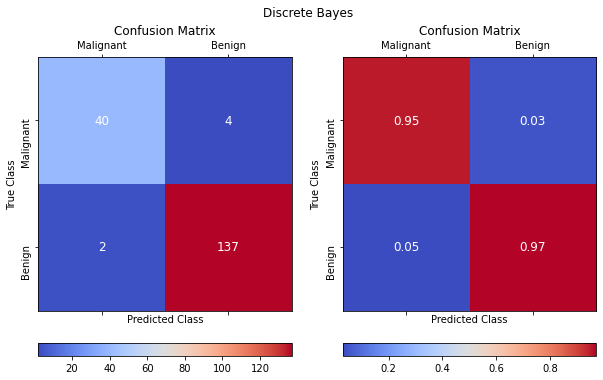

In [339]:
# Confusion Matrix
def plot_confusion_matrix(updated_test_df, title):
    test_df = updated_test_df.copy()
    correct_class = test_df.loc[test_df['pred_class'] == test_df['Malignant']]
    incorrect_class = test_df.loc[test_df['pred_class'] != test_df['Malignant']]

    malignant_true = correct_class.query('Malignant == 1').shape[0]
    malignant_false = test_df.query('Malignant == 1').shape[0] - malignant_true
    benign_true = correct_class.query('Malignant == 0').shape[0]
    benign_false = test_df.query('Malignant == 0').shape[0] - benign_true

    ## construct confusion matrix
    confusion_matrix_count = pd.DataFrame(columns=['Malignant', 'Benign'], index=['Malignant', 'Benign'])
    confusion_matrix_count.loc['Malignant', 'Malignant'] = malignant_true
    confusion_matrix_count.loc['Malignant', 'Benign'] = malignant_false
    confusion_matrix_count.loc['Benign', 'Malignant'] = benign_false
    confusion_matrix_count.loc['Benign', 'Benign'] = benign_true

    confusion_matrix_count = confusion_matrix_count.astype(int)

    confusion_matrix_prop = confusion_matrix_count.apply(lambda row: row / row.sum(), axis=1)

    fig, ax = plt.subplots(1,2,figsize=(10, 6))
    confusion_matrix = [confusion_matrix_count, confusion_matrix_prop]
    for ax, confusion_matrix in zip(ax, confusion_matrix):
        ax.matshow(confusion_matrix, cmap=plt.cm.coolwarm)
        ax.set_xlabel('Predicted Class')
        ax.set_ylabel('True Class')
        ax.set_title('Confusion Matrix')
        ax.set_xticks(np.arange(2))
        ax.set_yticks(np.arange(2))
        ax.set_xticklabels(['Malignant', 'Benign'])
        ax.set_yticklabels(['Malignant', 'Benign'], rotation=90)

        ax.text(0, 0, np.round(confusion_matrix.loc['Malignant', 'Malignant'], 2), ha='center', va='center', color='white', fontsize=12)
        ax.text(0, 1, np.round(confusion_matrix.loc['Malignant', 'Benign'], 2), ha='center', va='center', color='white', fontsize=12)
        ax.text(1, 0, np.round(confusion_matrix.loc['Benign', 'Malignant'], 2), ha='center', va='center', color='white', fontsize=12)
        ax.text(1, 1, np.round(confusion_matrix.loc['Benign', 'Benign'], 2), ha='center', va='center', color='white', fontsize=12)

        cbar = ax.figure.colorbar(ax.images[0], ax=ax, location='bottom', fraction=0.1, pad=0.1)

        ax.set_aspect('equal')
        ax.grid(False)

    fig.suptitle(title)

plot_confusion_matrix(test_df, 'Discrete Bayes')

#### Logistic Regression Classifier:

In [340]:
test_df = pd.read_csv('cancerTest.csv').astype(int)
test_df['pred_prob'] = test_df.apply(lambda row: lookup_table_df_logistic.loc[row['UCellSize'], row['SECellSize']], axis=1)
test_df['pred_class'] = test_df.apply(lambda row: 1 if row['pred_prob'] > 0.5 else (0 if row['pred_prob'] < 0.5 else np.nan), axis=1).astype(pd.Int64Dtype())

test_df.head(10)

,UCellSize,SECellSize,Malignant,pred_prob,pred_class
0,10,3,1,0.999815,1
1,1,1,0,0.023495,0
2,1,1,0,0.023495,0
3,1,2,0,0.035363,0
4,7,4,1,0.994461,1
5,1,3,0,0.052902,0
6,1,3,0,0.052902,0
7,4,3,1,0.719534,1
8,5,4,1,0.933328,1
9,1,2,0,0.035363,0


In [341]:
# incorrect class
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class
38,4,2,0,0.627388,1
77,3,3,1,0.417376,0
141,4,8,0,0.954686,1


In [342]:
## Average Probability of Incorrect Class
test_df['prob_loss'] = test_df.apply(lambda row: prob_loss(row), axis=1)
print(f"Average Probability of Incorrect Classification: {test_df['prob_loss'].mean()}")

Average Probability of Incorrect Classification: 0.06074529239317691


In [343]:
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class,prob_loss
38,4,2,0,0.627388,1,0.627388
77,3,3,1,0.417376,0,0.582624
141,4,8,0,0.954686,1,0.954686


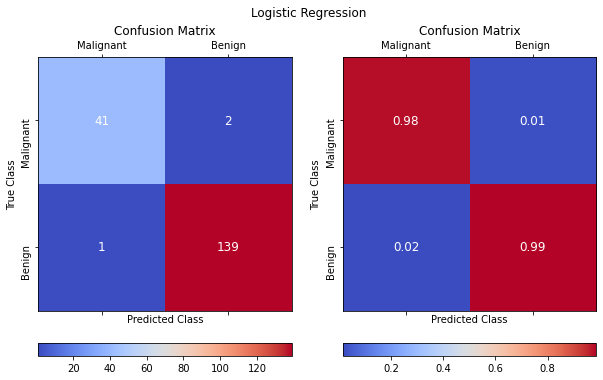

In [322]:
## Confusion Matrix
plot_confusion_matrix(test_df, 'Logistic Regression')

#### QDA

In [344]:
test_df = pd.read_csv('cancerTest.csv').astype(int)
test_df['pred_prob'] = test_df.apply(lambda row: lookup_table_df_qda.loc[row['UCellSize'], row['SECellSize']], axis=1)
test_df['pred_class'] = test_df.apply(lambda row: 1 if row['pred_prob'] > 0.5 else (0 if row['pred_prob'] < 0.5 else np.nan), axis=1).astype(pd.Int64Dtype())

test_df.head(10)

,UCellSize,SECellSize,Malignant,pred_prob,pred_class
0,10,3,1,1.000000,1
1,1,1,0,0.018829,0
2,1,1,0,0.018829,0
3,1,2,0,0.013267,0
4,7,4,1,1.000000,1
5,1,3,0,0.026750,0
6,1,3,0,0.026750,0
7,4,3,1,0.707095,1
8,5,4,1,0.990885,1
9,1,2,0,0.013267,0


In [345]:
# incorrect class
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class
38,4,2,0,0.810353,1
77,3,3,1,0.150238,0
141,4,8,0,0.999999,1


In [346]:
## Average Probability of Incorrect Class
test_df['prob_loss'] = test_df.apply(lambda row: prob_loss(row), axis=1)
print(f"Average Probability of Incorrect Classification: {test_df['prob_loss'].mean()}")

Average Probability of Incorrect Classification: 0.037401023437075194


In [347]:
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class,prob_loss
38,4,2,0,0.810353,1,0.810353
77,3,3,1,0.150238,0,0.849762
141,4,8,0,0.999999,1,0.999999


In [326]:
# incorrect class
test_df.loc[(test_df['pred_class'] != test_df['Malignant']) | (pd.isna(test_df['pred_prob']))].style.set_caption('Incorrect Class')

,UCellSize,SECellSize,Malignant,pred_prob,pred_class,prob_loss
38,4,2,0,0.810353,1,0.810353
77,3,3,1,0.150238,0,0.849762
141,4,8,0,0.999999,1,0.999999


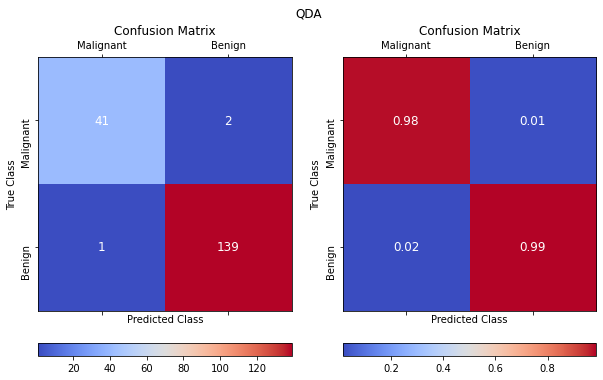

In [348]:
## Confusion Matrix
plot_confusion_matrix(test_df, 'QDA')


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


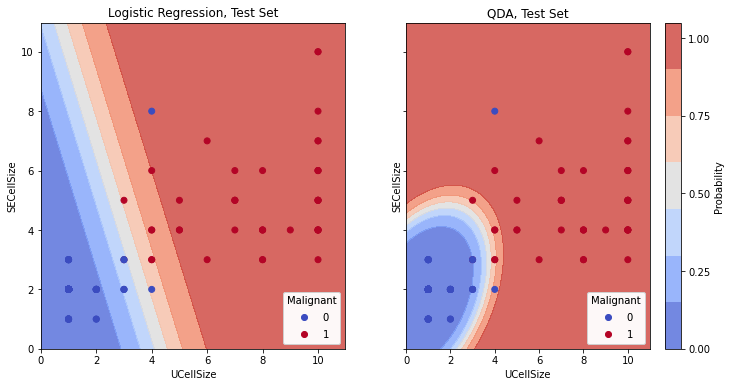

In [561]:
# decision boundary in test set
test_df = pd.read_csv('cancerTest.csv').astype(int)
fig, axs = plt.subplots(1,2,figsize=(12, 6), sharex=True, sharey=True)
clf = [logistic_reg, qda]
clf_name = ['Logistic Regression', 'QDA']
for ax, clf, clf_name in zip(axs, clf, clf_name):
    x_min, x_max = test_df['UCellSize'].min() - 1, test_df['UCellSize'].max() + 1
    y_min, y_max = test_df['SECellSize'].min() - 1, test_df['SECellSize'].max() + 1
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    contour = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(test_df['UCellSize'], test_df['SECellSize'], c=test_df['Malignant'], cmap=plt.cm.coolwarm)
    ax.set_xlabel('UCellSize')
    ax.set_ylabel('SECellSize')
    ax.set_title(f'{clf_name}, Test Set')
    ax.add_artist(ax.legend(*scatter.legend_elements(), loc='lower right', title='Malignant'))
# position colorbar horizontally
fig.colorbar(contour, ticks=[0, 0.25, 0.5, 0.75, 1], label = 'Probability',)


All three approaches yield similar performances on the test set, but QDA performs the best with both misclassification rate and average misclassification probability. For Logistic Regression and QDA, the misclassification rate is the same yet the probability loss is higher. This can be explained by the decision boundary of each classifier. In this case, QDA has a quadratic decision boundary which makes it respond more strongly to local quirks in the data, while linear logistic regression has a linear decision boundary. However, the big difference in their decision boundaries could be caused by the lack of predictor pairs (low `UCellSize` and high `SECellSize`) in the training set.

For our discrete bayes classifier, I think it would perform the best when the training set is large and also covers the whole potential predictor space, which would mitigate the risk of zero-frequency problem. For the other two classifiers, I think it would be better to study the distribution of different classes and choose a classifier with a decision boundary that would better separate the classes.

## Problem 3: Wine Data (40 points)

The Wine data set is a classic prototyping data set for classification methods.  The data set revolves around a 13 different measurements of the chemical properties of different wines that originate from three different *cultivars* (varieties of plants - in this case, grapes - that have been produced by selective breeding).  The goal of the classification task is to create a classifier for the three different *cultivars* using only the chemical properties.

The Wine data set only has 178 observations, so it is too small to split into training and test splits.  Therefore, cross-validation methods are needed to approximate expected prediction error.

### Part 1 (15 points)

Let's start with only 2 predictors: Color and OD280.  Start by creating a plot that shows the predictor values in the training data colored by their class.  Can you see approximately where the decision boundaries should be?

Using the training data, train a multinomial logistic regression classifier, a QDA classifier, and 2 Naive Bayes classifiers - one assuming normal conditional marginals and one using KDEs for the conditional marginals.  For each classifier, produce a plot that shows the Bayes' classifier as a function of Color and OD280 for the **minimum bounding box** implied by the predictors (which is just a fancy way of saying predict the class for many combinations of predictors within the minimum and maximum of each predictor).  How does the **decision boundary** differ between the 4 classifiers?  Which one appears to do the best at capturing the true decision boundary within the data?  Do any of the methods seem to overfit to the training data?

Hint: `Color` ranges from approximately 1 to 13 and `OD280` ranges from approximately 1 to 4.  There are a lot of approaches to creating the decision plots, but I think that doing a grid evaluation is easiest.


In [349]:
wine_df = pd.read_csv('wineTrain.csv')
wine_df.head(10)

,Class,Alcohol,MalicAcid,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Text(0.5, 1.0, 'Wine Data')

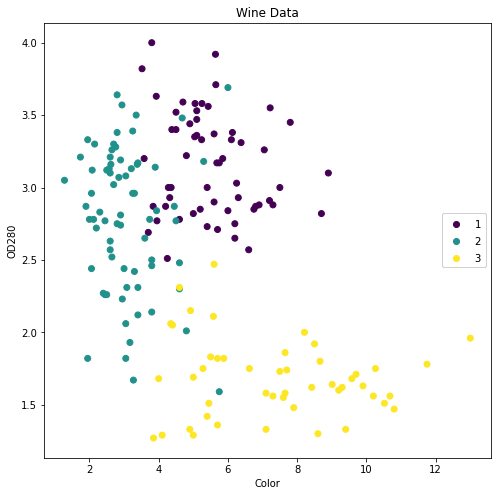

In [380]:
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(wine_df['Color'], wine_df['OD280'], c=wine_df['Class'], cmap=plt.cm.viridis)
ax.add_artist(ax.legend(*scatter.legend_elements(), loc='center right', bbox_to_anchor=(1, 0.5)))
ax.set_xlabel('Color')
ax.set_ylabel('OD280')
ax.set_title('Wine Data')


From this plot, we can see that the potential decision boundary is not very complex and the classes can even be separated with linear decision boundaries.

#### Multinomial Logistic Regression Classifier:

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


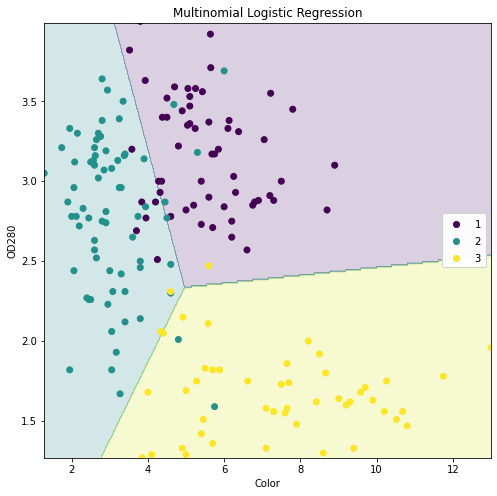

In [393]:
logistic_wine = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='none')
logistic_wine.fit(wine_df[['Color', 'OD280']], wine_df['Class'])

# plot decision boundary
def plot_decsion_boundary(clf, ax, title):

    x_min, x_max = wine_df['Color'].min(), wine_df['Color'].max()
    y_min, y_max = wine_df['OD280'].min(), wine_df['OD280'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    contour = ax.contourf(xx, yy, z, cmap=plt.cm.viridis, alpha=0.2)
    scatter = ax.scatter(wine_df['Color'], wine_df['OD280'], c=wine_df['Class'], cmap=plt.cm.viridis)
    ax.add_artist(ax.legend(*scatter.legend_elements(), loc='center right', bbox_to_anchor=(1, 0.5)))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Color')
    ax.set_ylabel('OD280')
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(8, 8))
plot_decsion_boundary(logistic_wine, ax, 'Multinomial Logistic Regression')


#### QDA

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


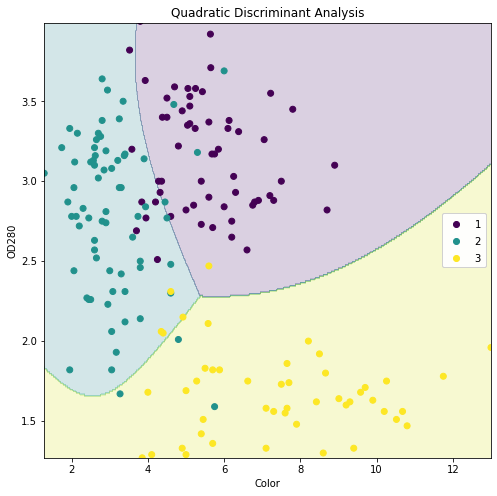

In [394]:
qda_wine = QuadraticDiscriminantAnalysis()
qda_wine.fit(wine_df[['Color', 'OD280']], wine_df['Class'])

# plot decision boundary
fig, ax = plt.subplots(figsize=(8, 8))
plot_decsion_boundary(qda_wine, ax, 'Quadratic Discriminant Analysis')

#### Naive Bayes Classifier (Normal Marginals):

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


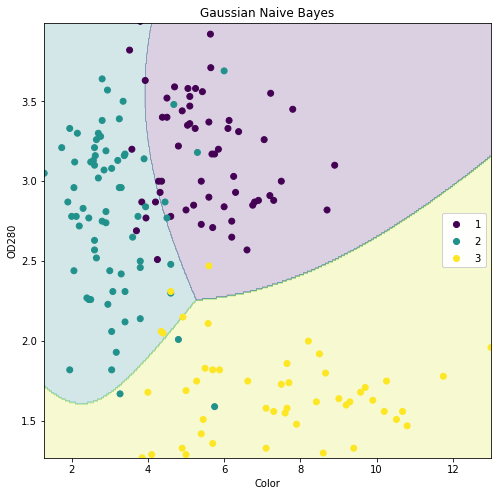

In [396]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
GaussianNB_wine = GaussianNB()
GaussianNB_wine.fit(wine_df[['Color', 'OD280']], wine_df['Class'])

# plot decision boundary
fig, ax = plt.subplots(figsize=(8, 8))
plot_decsion_boundary(GaussianNB_wine, ax, 'Gaussian Naive Bayes')
# pretty similar to QDA, could be that GaussianNB only differs from QDA in the way that it assumes independence between features

#### Naive Bayes Classifier (KDEs):

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Kernel Density Estimation for Class == 1')

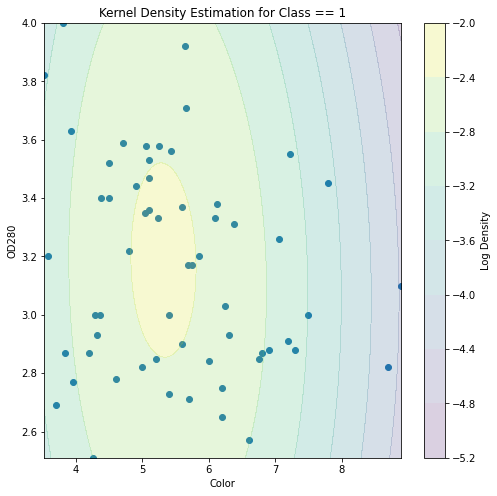

In [439]:
from sklearn.neighbors import KernelDensity
KernelDensity_wine = KernelDensity()
subset_df = wine_df.query('Class == 1')
KernelDensity_wine.fit(subset_df[['Color', 'OD280']])
# plot density over hist
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(subset_df['Color'], subset_df['OD280'])
xx, yy = np.meshgrid(np.arange(subset_df['Color'].min(), subset_df['Color'].max(), 0.01), np.arange(subset_df['OD280'].min(), subset_df['OD280'].max(), 0.01))
z = KernelDensity_wine.score_samples(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
contour = ax.contourf(xx, yy, z, cmap=plt.cm.viridis, alpha=0.2)
cbar = plt.colorbar(contour)
cbar.ax.set_ylabel('Log Density')
ax.set_xlabel('Color')
ax.set_ylabel('OD280')
ax.set_title('Kernel Density Estimation for Class == 1')



/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


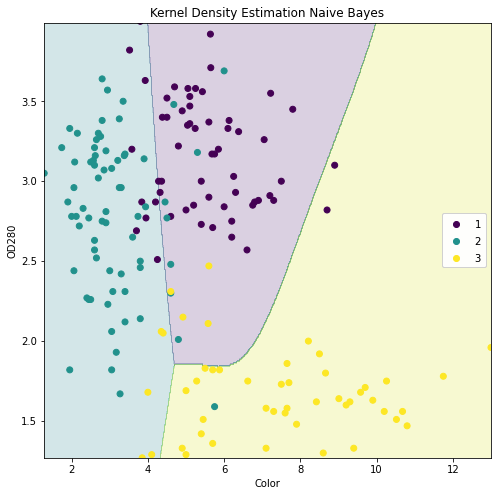

In [547]:
from sklearn.neighbors import KernelDensity

class kdeNB:
    def __init__(self, kernel='gaussian'):
        self.kernel = kernel
        self.kde_ = None
        self.classes_ = None
        self.priors_ = None


    def fit(self, X, y):
        self.kde_ = []
        classes = np.unique(y)
        for c in classes:
            X_c = X[y == c]
            self.kde_.append(KernelDensity(kernel=self.kernel).fit(X_c))
        self.classes_ = classes
        self.priors_ = np.bincount(y) / len(y)
        self.priors_ = np.delete(self.priors_, 0) # hacky, fix later
        
        return self
        
    def predict(self, X):
        log_denominator = []
        for kde, prior in zip(self.kde_, self.priors_):
            log_density = kde.score_samples(X)
            log_denominator.append(log_density + np.log(prior))
        marginals = np.log(np.sum(np.exp(log_denominator), axis=0))
        posterior = log_denominator - marginals
        # debug
        self.marginals_ = marginals
        self.log_denominator_ = log_denominator
        self.posterior_ = posterior
        return self.classes_[np.argmax(posterior, axis=0)]


    def predict_proba(self, X):
        log_denominator = []
        for kde, prior in zip(self.kde_, self.priors_):
            log_density = kde.score_samples(X)
            log_denominator.append(log_density + np.log(prior))
        return np.exp(log_denominator)/np.sum(np.exp(log_denominator), axis=0)

    def get_params(self, deep=True):
        return {'kernel': self.kernel}
    

            
kdeNB_wine = kdeNB()
kdeNB_wine.fit(wine_df[['Color', 'OD280']], wine_df['Class'])

# plot decision boundary
fig, ax = plt.subplots(figsize=(8, 8))
plot_decsion_boundary(kdeNB_wine, ax, 'Kernel Density Estimation Naive Bayes')
            

In [526]:
# misclassified 
temp_df = wine_df.copy()
temp_df['Predicted'] = kdeNB_wine.predict(temp_df[['Color', 'OD280']])
temp_df.loc[:, ['Prob1', 'Prob2', 'Prob3']] = kdeNB_wine.predict_proba(temp_df[['Color', 'OD280']]).T
temp_df['prob_sum'] = temp_df['Prob1'] + temp_df['Prob2'] + temp_df['Prob3']
temp_df[['Color', 'OD280', 'Class', 'Predicted', 'Prob1', 'Prob2', 'Prob3', 'prob_sum']].query('Class != Predicted')

,Color,OD280,Class,Predicted,Prob1,Prob2,Prob3,prob_sum
18,8.70,2.82,1,3,0.395872,0.002138,0.601990,1.0
22,3.80,4.00,1,2,0.427462,0.548546,0.023993,1.0
23,3.93,3.63,1,2,0.432013,0.527660,0.040327,1.0
24,3.52,3.82,1,2,0.330559,0.647429,0.022013,1.0
25,3.58,3.20,1,2,0.297346,0.657463,0.045191,1.0
27,3.95,2.77,1,2,0.345986,0.556021,0.097993,1.0
32,3.84,2.87,1,2,0.330852,0.588222,0.080927,1.0
34,4.20,2.87,1,2,0.417777,0.474275,0.107948,1.0
37,4.25,2.51,1,2,0.378083,0.466139,0.155778,1.0
38,3.70,2.69,1,2,0.280570,0.635110,0.084321,1.0


We can see that Gaussian Naive Bayes and QDA have almost the same decision boundary, and KDE Naive Bayes perform the worst, which has the highest number of misclassifications. I would argue that the other three classifiers all have decision boundaries that neatly separate the classes, even though they differ in shapes. There is no obvious signs of overfitting or underfitting. KDE Naive Bayes seems to underfit a bit but it could be caused by my implementation.

### Part 2 (15 points)

Now, let's work with all 13 predictors.  The goal of this exercise is to build a model that best predicts out of sample wines, so use 5-fold cross validation to compute an estimate of the expected prediction error for three different classifiers - multinomial logistic regression, QDA, and naive Bayes (make a choice for the marginals given your observations in part 1).  For each classifier, compute the 5-fold estimate of the average probability of incorrect classification **and** the misclassification rate with respect to the Bayes' classifier.

Which model performs best?  Worst?

In [548]:
from sklearn.model_selection import cross_val_score

logistic_wine_full = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='none')
print(f"""Logistic Regression with All Predictors, 5-fold CV,  Misclassification Rate:
{1- cross_val_score(logistic_wine_full, wine_df.drop('Class', axis=1), wine_df['Class'], cv=5, scoring='accuracy').mean()}
""".replace('\n', ' '))

qda_wine_full = QuadraticDiscriminantAnalysis()
print(f"""Quadratic Discriminant Analysis with All Predictors, 5-fold CV,  Misclassification Rate:
{1 - cross_val_score(qda_wine_full, wine_df.drop('Class', axis=1), wine_df['Class'], cv=5, scoring='accuracy').mean()}
""".replace('\n', ' '))

GaussianNB_wine_full = GaussianNB()
print(f"""Gaussian Naive Bayes with All Predictors, 5-fold CV,  Misclassification Rate:
{1 - cross_val_score(GaussianNB_wine_full, wine_df.drop('Class', axis=1), wine_df['Class'], cv=5, scoring='accuracy').mean()}
""".replace('\n', ' '))

kdeNB_wine_full = kdeNB()
print(f"""Kernel Density Estimation Naive Bayes with All Predictors, 5-fold CV, Misclassification Rate:
{1 - cross_val_score(kdeNB_wine_full, wine_df.drop('Class', axis=1), wine_df['Class'], cv=5, scoring='accuracy').mean()}
""".replace('\n', ' '))





Logistic Regression with All Predictors, 5-fold CV,  Misclassification Rate: 0.08380952380952389 
Quadratic Discriminant Analysis with All Predictors, 5-fold CV,  Misclassification Rate: 0.044920634920634916 
Gaussian Naive Bayes with All Predictors, 5-fold CV,  Misclassification Rate: 0.03365079365079371 
Kernel Density Estimation Naive Bayes with All Predictors, 5-fold CV, Misclassification Rate: 0.3666666666666666 


/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_6344/2055749493.py:28: RuntimeWarning: divide by zero encountered in log
  marginals = np.log(np.sum(np.exp(log_denominator), axis=0))
/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_6344/2055749493.py:28: RuntimeWarning: divide by zero encountered in log
  marginals = np.log(np.sum(np.exp(log_denominator), axis=0))
/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_6344/2055749493.py:28: RuntimeWarning: divide by zero encountered in log
  marginals = np.log(np.sum(np.exp(log_denominator), axis=0))


We can see that Gaussian Naive Bayes have the lowest misclassification rate or the highest accuracy compared to the other three, and the KDE naive bayes perform the worst.

### Part 3 (10 points)

Broadly discuss situations where Naive Bayes is likely to outperform QDA.  Think about this from a loss perspective as well as a computational perspective.  Specifically, consider the MLE for the multivariate normal you derive above - when do you think this computation would become time and/or computer space prohibitive?



When Naive Bayes is better than QDA
1. The MLE for the multivariate normal is computationally prohibitive when the number of observation is large.
2. independent predictors?
   
When QDA is better than Naive Bayes
1. Continuous predictors
2. Scarce data

   
QDA is computationally expensive when the dataset is very large because it requires to compute a inverse of the covariance matrix in its objective function.